## Telecom Churn Case Study

1. Abhishek Soni
2. Priyanka Valge

In [1]:
import os
import sys

# Import the required libraries
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

# visulaisation
from matplotlib.pyplot import xticks
%matplotlib inline

# To display all the columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# This library will be required to split the data set into train and test sets respectively.
from sklearn.model_selection import train_test_split

# This will be required to scale the data.
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.preprocessing import RobustScaler, scale

#for PCA
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA

# model building packages
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, mean_squared_error
from sklearn.metrics import confusion_matrix, classification_report, f1_score, roc_auc_score, roc_curve

from scipy import stats
from scipy.stats import norm, skew
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from imblearn.over_sampling import SMOTE 
from collections import Counter
from sklearn.pipeline import make_pipeline, Pipeline

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics

# Supress unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

### Reading and Understanding the Data

In [2]:
telecom_data = pd.read_csv('telecom_churn_data.csv')
telecom_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

### Normal check of telecom_churn_data

In [3]:
# checking tail of the data
telecom_data.tail()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
99994,7001548952,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,18.471,69.161,57.530,29.950,5.40,3.36,5.91,0.00,15.19,54.46,52.79,27.14,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,5.40,3.36,5.91,0.00,12.78,54.46,49.58,24.78,0.00,0.00,0.00,2.25,0.00,0.0,3.21,0.11,18.18,57.83,55.49,27.03,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,2.41,3.01,3.21,0.11,0.00,0.0,0.0,0.0,20.59,60.84,58.71,27.14,27.68,20.78,40.94,22.06,47.96,46.93,76.08,82.89,17.45,5.16,43.79,49.46,93.09,72.88,160.83,154.43,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00

In [4]:
# checking Shape of the data
telecom_data.shape

(99999, 226)

- This dataset has 99999 rows and 226 columns

In [5]:
# Inforamation of data
telecom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [6]:
# checking for duplicate rows
sum(telecom_data.duplicated(subset = 'mobile_number'))

0

- So there are no duplicate mobile number is present in the data.

In [7]:
# Let's check the columns in the data set:
telecom_data.columns.values

array(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6', 'arpu_7',
       'arpu_8', 'arpu_9', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8',
       'onnet_mou_9', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'offnet_mou_9', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8',
       'roam_ic_mou_9', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
       'roam_og_mou_9', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7',
       'loc_og_t2t_mou_8', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_6',
       'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2m_mou_9',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
       'loc_og_t2f_mou_9', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7',
       'loc_og_t2c_mou_8', 'loc_og_t2c_mou_9', 'loc_og_mou_6',
       'loc_og_mou_7', 'loc_og_mou_8', 'loc_og_mou_9', 'std_og_t2t_mou_6',
       'std_og_t2t

In [8]:
# feature type summary
telecom_data.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
mobile_number               int64
circle_id                   int64
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_6        object
last_date_of_month_7        object
last_date_of_month_8        object
last_date_of_month_9        object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
arpu_9                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
onnet_mou_9                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
offnet_mou_9                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_ic_mou_9               float6

- Here large number of the columns are numeric type, but we need to inspect which are the categorical columns.

In [9]:
# Summary of given data set 
telecom_data.describe(include='all')

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999,99398,98899,98340,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000

### Data Cleaning Steps
### Missing values treatment
First we will check count and percentage of missing values present in the data set

In [10]:
# Checking Column-wise Total Count and Percentage of Missing Values
count = pd.DataFrame(telecom_data.isnull().sum().sort_values(ascending=False), columns=['null_counts'])
percent = pd.DataFrame(round(100*(telecom_data.isnull().sum()/telecom_data.shape[0]),2).sort_values(ascending=False)\
                          ,columns=['null_percentage'])
Missing_Value_Table = pd.concat([count, percent], axis = 1)
Missing_Value_Table

,null_counts,null_percentage
count_rech_2g_6,74846,74.85
date_of_last_rech_data_6,74846,74.85
count_rech_3g_6,74846,74.85
av_rech_amt_data_6,74846,74.85
max_rech_data_6,74846,74.85
total_rech_data_6,74846,74.85
arpu_3g_6,74846,74.85
arpu_2g_6,74846,74.85
night_pck_user_6,74846,74.85
fb_user_6,74846,74.85


In [11]:
# making a copy of data
telecom_data1=telecom_data.copy()

# create column name list by types of columns
# making list of date columns, categorical columns and id columns
id_cols = ['mobile_number', 'circle_id']

date_cols = ['last_date_of_month_6',
             'last_date_of_month_7',
             'last_date_of_month_8',
             'last_date_of_month_9',
             'date_of_last_rech_6',
             'date_of_last_rech_7',
             'date_of_last_rech_8',
             'date_of_last_rech_9',
             'date_of_last_rech_data_6',
             'date_of_last_rech_data_7',
             'date_of_last_rech_data_8',
             'date_of_last_rech_data_9'
            ]

categorical_cols =  ['night_pck_user_6',
                     'night_pck_user_7',
                     'night_pck_user_8',
                     'night_pck_user_9',
                     'fb_user_6',
                     'fb_user_7',
                     'fb_user_8',
                     'fb_user_9'
                    ]

num_cols = [column for column in telecom_data.columns if column not in id_cols + date_cols + categorical_cols]

# print the number of columns in each list
print("#ID cols: %d\n#Date cols:%d\n#Numeric cols:%d\n#Category cols:%d" % 
      (len(id_cols), len(date_cols), len(num_cols), len(categorical_cols)))

# checking if we have missed any column 
print(len(id_cols) + len(date_cols) + len(num_cols) + len(categorical_cols) == telecom_data.shape[1])

#ID cols: 2
#Date cols:12
#Numeric cols:204
#Category cols:8
True


### Treating Missing Values in Categorical Columns

In [12]:
# We will replace missing values in the categorical values with '-1' where '-1' will be a new category.
# Replacing missing values with '-1' in categorical columns
telecom_data[categorical_cols]=telecom_data[categorical_cols].apply(lambda x: x.fillna(-1))

In [13]:
# missing value ratio
print("Missing value in categorical columns:\n")
print((telecom_data[categorical_cols].isnull().sum()/len(telecom_data))*100)

Missing value in categorical columns:

night_pck_user_6    0.0
night_pck_user_7    0.0
night_pck_user_8    0.0
night_pck_user_9    0.0
fb_user_6           0.0
fb_user_7           0.0
fb_user_8           0.0
fb_user_9           0.0
dtype: float64


### Treating Missing Values in Recharge Columns

In [14]:
# Creating a list of recharge columns and storing in the variable
# some recharge columns have minimum value of 1 while some don't

recharge_cols=['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
                 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
                 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9',
                 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
                 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
                 ]

telecom_data[recharge_cols].describe(include='all')

,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
count,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.00000,25153.000000,25571.000000,26339.000000,25922.000000
mean,2.463802,2.666419,2.651999,2.441170,1.864668,2.044699,2.016288,1.781807,0.599133,0.621720,0.635711,0.659363,126.393392,126.729459,125.717301,124.94144,192.600982,200.981292,197.526489,192.734315
std,2.789128,3.031593,3.074987,2.516339,2.570254,2.768332,2.720132,2.214701,1.274428,1.394524,1.422827,1.411513,108.477235,109.765267,109.437851,111.36376,192.646318,196.791224,191.301305,188.400286
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.500000,0.500000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,25.000000,25.000000,25.000000,25.00000,82.000000,92.000000,87.000000,69.000000
50%,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,145.000000,145.000000,145.000000,145.00000,154.000000,154.000000,154.000000,164.000000
75%,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,177.000000,177.000000,179.000000,179.00000,252.000000,252.000000,252.000000,252.000000
max,61.000000,54.000000,60.000000,84.000000,42.000000,48.000000,44.000000,40.000000,29.000000,35.000000,45.000000,49.000000,1555.000000,1555.000000,1555.000000,1555.00000,7546.000000,4365.000000,4076.000000,4061.000000


In [15]:
# It is also observed that the recharge date and the recharge value are missing together 
# which means the customer didn't recharge
telecom_data.loc[telecom_data.total_rech_data_6.isnull() & telecom_data.date_of_last_rech_data_6.isnull(),
          ["total_rech_data_6", "date_of_last_rech_data_6"]].head(10)

,total_rech_data_6,date_of_last_rech_data_6
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
5,NaN,NaN
6,NaN,NaN
7,NaN,NaN
8,NaN,NaN
9,NaN,NaN
10,NaN,NaN
11,NaN,NaN


- In the recharge variables we can impute null values with zero where minimum recharge amount is 1 since it means customer didn't recharge their numbere that month. 

In [16]:
# imputing null values with zero incase of recharge columns

cols_to_impute_zero=['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
                'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
                'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9']

telecom_data[cols_to_impute_zero]=telecom_data[cols_to_impute_zero].apply(lambda x : x.fillna(0))

In [17]:
# Now, let's see if values are imputed correctly
# Checking for missing value in rechagre columns
print("Missing value in recharge columns:\n")
print((telecom_data[cols_to_impute_zero].isnull().sum()/len(telecom_data))*100)

Missing value in recharge columns:

total_rech_data_6     0.0
total_rech_data_7     0.0
total_rech_data_8     0.0
total_rech_data_9     0.0
av_rech_amt_data_6    0.0
av_rech_amt_data_7    0.0
av_rech_amt_data_8    0.0
av_rech_amt_data_9    0.0
max_rech_data_6       0.0
max_rech_data_7       0.0
max_rech_data_8       0.0
max_rech_data_9       0.0
dtype: float64


In [18]:
# Removing date and id columns as they are not useful as of now

print("Shape before dropping: ", telecom_data.shape)
telecom_data = telecom_data.drop(id_cols + date_cols, axis=1)
print("Shape after dropping: ", telecom_data.shape)

Shape before dropping:  (99999, 226)
Shape after dropping:  (99999, 212)


In [19]:
## droping the variables which have more than 40% missing values.

telecom_data = telecom_data.drop(['count_rech_2g_6','count_rech_2g_7','count_rech_2g_8','count_rech_2g_9',
                                  'count_rech_3g_6','count_rech_3g_7','count_rech_3g_8','count_rech_3g_9',
                                  'arpu_3g_6','arpu_3g_7','arpu_3g_8','arpu_3g_9',
                                  'arpu_2g_6','arpu_2g_7','arpu_2g_8','arpu_2g_9'],axis=1)

In [20]:
telecom_data.shape

(99999, 196)

### Handling remaining columns with missing values using Iterative Imputer 
- Now we will use IterativeImputer to imputing the remaining columns with missing values between 1-10%

In [21]:
# Imputation of missing values using IterativeImputer
imputer = IterativeImputer(max_iter=10, verbose=0)

telecom_data2 = imputer.fit_transform(telecom_data)

In [22]:
type(telecom_data2)

numpy.ndarray

In [23]:
# Creating dataframe 

telecom_df = pd.DataFrame(telecom_data2)

telecom_df.columns = telecom_data.columns

telecom_df.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,0.0,0.0,0.0,197.385,214.816,213.803,21.100,-94.948715,-82.078577,0.00,-107.73024,143.858492,133.318526,0.00,113.627972,28.593227,11.99516,0.00,8.074618,33.240839,12.277816,0.00,1.496385,-99.945785,-117.33987,0.00,-120.156184,93.308739,91.377692,0.00,90.394483,3.78147,3.806291,0.00,3.703434,2.462374,-2.529707,0.00,-0.114995,-2.941218,-22.160517,0.00,-26.056487,30.771733,33.193822,0.00,33.887529,87.131272,90.608118,0.00,86.330599,1.203276,1.185099,0.00,1.071059,0.0,0.0,0.0,0.0,119.091575,124.997458,0.00,121.279831,-120.41952,-107.850036,0.0,-99.656059,3.910474,4.973072,0.00,4.40408,0.442877,0.048471,0.0,0.049321,0.00,0.00,0.00,0.00,-58.886636,-63.891445,0.16,-58.757213,107.484823,107.116424,4.13,106.173565,12.072627,12.593512,1.15,12.163193,60.593879,55.783535,5.44,59.574621,-23.060556,-23.206786,0.00,-22.241527,20.715394,21.652671,0.00,19.616741,2.161984,2.220472,0.00,2.17423,0.0,0.0,0.0,0.0,-0.189069,0.664784,0.00,-0.450647,0.00,0.00,5.44,0.00,-67.603604,-64.484647,0.0,-67.989771,7.070296,7.406747,0.0,8.014226,0.853664,1.011113,0.0,1.017837,4.0,3.0,2.0,6.0,362.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,252.0,2

In [24]:
telecom_df.shape

(99999, 196)

In [25]:
# Again Checking Column-wise Total Count and Percentage of Missing Values
count1 = pd.DataFrame(telecom_df.isnull().sum().sort_values(ascending=False), columns=['null_counts'])
percent1 = pd.DataFrame(round(100*(telecom_df.isnull().sum()/telecom_df.shape[0]),2).sort_values(ascending=False)\
                          ,columns=['null_percentage'])
Missing_Value_Table1 = pd.concat([count1, percent1], axis = 1)
Missing_Value_Table1.head()

,null_counts,null_percentage
sep_vbc_3g,0,0.0
og_others_7,0,0.0
spl_og_mou_9,0,0.0
spl_og_mou_8,0,0.0
spl_og_mou_7,0,0.0


- From above Missing values table we can see we have succesfully treated all the null values.

In [26]:
# VBC Columns is Volume based cost - when no specific scheme is not purchased and paid as per usage
# We will convert them as per the standard followed for assigning month names as numeric

telecom_df.rename(columns={"jun_vbc_3g":"vbc_3g_6", "jul_vbc_3g":"vbc_3g_7", 
                   "aug_vbc_3g":"vbc_3g_8", "sep_vbc_3g":"vbc_3g_9"}, inplace=True)

In [27]:
#getting the coulmns with only one unique value
cols_to_remove = []
for i in list(telecom_df):
    if len(telecom_df[i].value_counts()) == 1:
        cols_to_remove.append(i)
print(cols_to_remove)

['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_t2c_mou_9', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9']


In [28]:
#So, above columns should not have any predictive power and we can drop them
telecom_df = telecom_df.drop(cols_to_remove, axis = 1)
telecom_df.shape

(99999, 185)

### Deriving Features
### Filter High Value Customers (HVC) 
let's focus on reducing the size of the dataset by finding out the High Value Customers.
- Since we need to predict churn only for the high-value customers. High-value customers are those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).
- Now, for this we will need to first derive some new features as follows:
    - First we derive the total amount of data recharge by a customer using total data recharges x average data recharge amount
    - After that we will find the total amount spent by a customer using total data recharge amount + total call recharge amount
    - Using the total amount spent during good phase(June and July) we will derive the average recharge amount per customer

In [29]:
# calculate the total data recharge amount for June and July >> number of recharges * average recharge amount
telecom_df['total_data_rech_6'] = telecom_df['total_rech_data_6']*telecom_df['av_rech_amt_data_6']
telecom_df['total_data_rech_7'] = telecom_df['total_rech_data_7']*telecom_df['av_rech_amt_data_7']

# Creating a derived feature : Total amount of recharge done for calls and data
# adding total data recharge and total recharge to get total combined recharge amount for a month
telecom_df['Tot_amt_call_data_6']= telecom_df['total_rech_amt_6'] + telecom_df['total_data_rech_6']
telecom_df['Tot_amt_call_data_7']= telecom_df['total_rech_amt_7'] + telecom_df['total_data_rech_7']

# calculate average recharge done by customer in June and July
telecom_df['Avg_rec_amt_6_7'] = (telecom_df['Tot_amt_call_data_6'] + telecom_df['Tot_amt_call_data_7'])/2

# Calculating the 70th percentile recharge amount
avgRec70Percentile = telecom_df['Avg_rec_amt_6_7'].quantile(0.7)
avgRec70Percentile

478.0

In [30]:
# Retaining only those customers who have recharged their mobiles with more than or equal to 70th percentile amount
# Creating a separate dataframe where the average amount is greater than or equal to 70th percentile
High_value_Cust = telecom_df[telecom_df['Avg_rec_amt_6_7']>=avgRec70Percentile]

# Looking at the shape of the new df
High_value_Cust.shape

(30001, 190)

In [31]:
# Removing variables created to filter high-value customers
High_value_Cust = High_value_Cust.drop(['total_data_rech_6', 'total_data_rech_7',
                                      'Tot_amt_call_data_6', 'Tot_amt_call_data_7', 'Avg_rec_amt_6_7'], axis=1)
High_value_Cust.shape

(30001, 185)

### Derive Churn

In [32]:
# Calculate total incoming and outgoing minutes of usage
High_value_Cust['total_calls_mou_9'] = High_value_Cust.total_ic_mou_9 + High_value_Cust.total_og_mou_9

In [33]:
# Calculate 2g and 3g data consumption
High_value_Cust['total_internet_mb_9'] =  High_value_Cust.vol_2g_mb_9 + High_value_Cust.vol_3g_mb_9

In [34]:
# Create churn variable: 
# Those who have not made or received any phone calls and did not use 2g or 3g internet in the month of September, have churned

# 0 - not churn, 1 - churn
High_value_Cust['churn'] = High_value_Cust.apply(lambda x: 1 if (x.total_calls_mou_9 == 0 
                                                                 and x.total_internet_mb_9 == 0) else 0, axis=1)

In [35]:
# Delete derived variables
High_value_Cust = High_value_Cust.drop(['total_calls_mou_9', 'total_internet_mb_9'], axis=1)

In [36]:
# Percentage of rows showing Churn/Non-churn
round((High_value_Cust['churn'].value_counts()/High_value_Cust.shape[0])*100,2)

0    91.86
1     8.14
Name: churn, dtype: float64

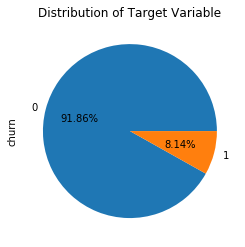

In [37]:
#Plotting pie chart to see the percentage of converted and non-converted leads
High_value_Cust['churn'].value_counts().plot.pie(autopct='%1.2f%%',shadow=False)
plt.title("Distribution of Target Variable")
plt.show()

- We can see that the data is highly imbalanced. We will handle it later during modelling process.

In [38]:
# Removing the columns for the september month
colsWith9 = [col for col in High_value_Cust.columns if col.endswith('_9')]
High_value_Cust.drop(columns=colsWith9,inplace=True)

### Derive Variables and EDA

In [39]:
# Average revenue per user per month
High_value_Cust['arpu_pm'] = (High_value_Cust.arpu_6 + High_value_Cust.arpu_7 + High_value_Cust.arpu_8)/3


# difference Incoming call mou per month
High_value_Cust['diff_ic_mou'] = (High_value_Cust.total_ic_mou_6 
                                  + High_value_Cust.total_ic_mou_7)/2 - High_value_Cust.total_ic_mou_8


# difference outgoing call mou per month 
High_value_Cust['diff_oc_mou'] = (High_value_Cust.total_og_mou_6 
                                  + High_value_Cust.total_og_mou_7)/2 - High_value_Cust.total_og_mou_8


#  Average Total recharge amt of data 
High_value_Cust["Av_tot_amt_data"] = ((High_value_Cust.total_rech_data_6*High_value_Cust.av_rech_amt_data_6) 
                                      + (High_value_Cust.total_rech_data_7*High_value_Cust.av_rech_amt_data_7) 
                                      + (High_value_Cust.total_rech_data_8*High_value_Cust.av_rech_amt_data_8)
                                     )/3


# Average total recharge call
High_value_Cust['Av_tot_rech'] = (High_value_Cust.total_rech_amt_6 
                                  + High_value_Cust.total_rech_amt_7 
                                  + High_value_Cust.total_rech_amt_8
                                 )/3


# difference roaming incoming call 
High_value_Cust['diff_roam_ic_mou'] = (High_value_Cust.roam_ic_mou_6 
                                       + High_value_Cust.roam_ic_mou_7)/2 - High_value_Cust.roam_ic_mou_8


# difference roaming outgoing call 
High_value_Cust['diff_roam_og_mou'] = (High_value_Cust.roam_og_mou_6 
                                       + High_value_Cust.roam_og_mou_7)/2 - High_value_Cust.roam_og_mou_8


# Average Recharge number per month
High_value_Cust['Av_rech_number_pm'] = (High_value_Cust.total_rech_num_6 
                                        + High_value_Cust.total_rech_num_7 
                                        + High_value_Cust.total_rech_num_8
                                       )/3


# As we have created new features we don't require old features from which these new features are formed

cols_drop = ['arpu_6', 'arpu_7', 'arpu_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'total_og_mou_6',
            'total_og_mou_7', 'total_og_mou_8', 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
            'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8','total_rech_amt_6','total_rech_amt_7',
            'total_rech_amt_8', 'total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8', 'roam_ic_mou_6', 'roam_ic_mou_7',
            'roam_ic_mou_8', 'roam_og_mou_6','roam_og_mou_7', 'roam_og_mou_8']

High_value_Cust.drop(cols_drop, axis=1, inplace=True)
High_value_Cust.shape

(30001, 121)

### Exploratory Data Analysis

In [40]:
#creating a list of categorical columns & numeical columns

categorical_cols=['night_pck_user_6','night_pck_user_7','night_pck_user_8','fb_user_6','fb_user_7','fb_user_8']
numeric_cols=[col for col in High_value_Cust.columns if col not in categorical_cols]

In [41]:
High_value_Cust[numeric_cols] = High_value_Cust[numeric_cols].apply(pd.to_numeric)
High_value_Cust[categorical_cols] = High_value_Cust[categorical_cols].apply(lambda column: column.astype("category"), axis=0)

In [42]:
# Creating a function to plot bar plots for the categorical columns
def PlotCategories(var):
    fig=plt.figure(figsize=(15,6))
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)

    ax1.set_title('% Rate of churn for ' + '%s' %var)
    ax2.set_title('% Rate of non churn for '+'%s' %var)

    ax1.set_xlabel(var)
    ax2.set_xlabel(var)
    ax1.set_ylabel('Percentage')
    ax2.set_ylabel('Percentage')

    cDf=pd.crosstab(High_value_Cust[var],High_value_Cust['churn']).apply(lambda r: r*100/r.sum(), axis=1)
    dDf=cDf[1].sort_values(ascending=False)
    ndDf=cDf[0].sort_values(ascending=False)

    p1=sns.barplot(y=dDf.values,x=dDf.index.tolist(), ax=ax1)
    p1.set_xticklabels(p1.get_xticklabels(),rotation=90)

    p2=sns.barplot(y=ndDf.values,x=ndDf.index.tolist(), ax=ax2)
    p2.set_xticklabels(p2.get_xticklabels(),rotation=90)

    for p in p1.patches:
        p1.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()),ha = 'center', va = 'center', xytext = (0, 3), textcoords = 'offset points')
    for p in p2.patches:
        p2.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()),ha = 'center', va = 'center', xytext = (0, 3), textcoords = 'offset points')

    fig.tight_layout()
    plt.show()

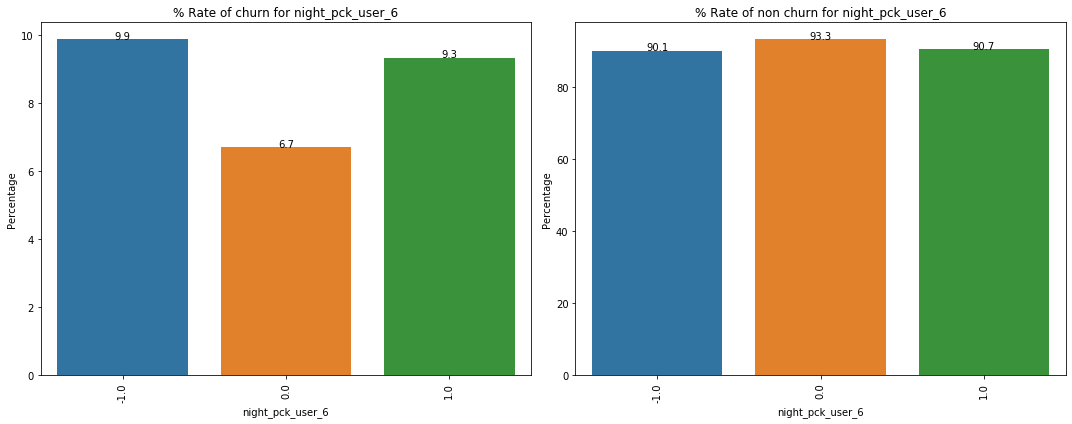

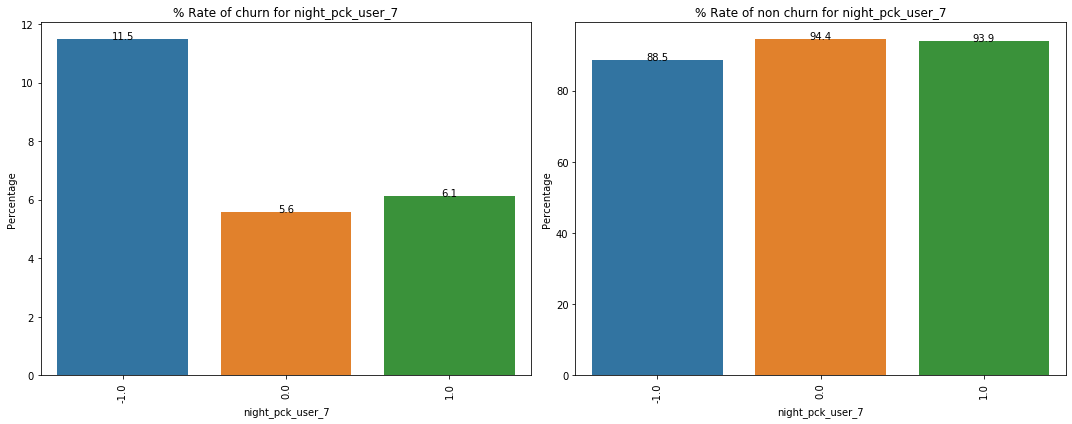

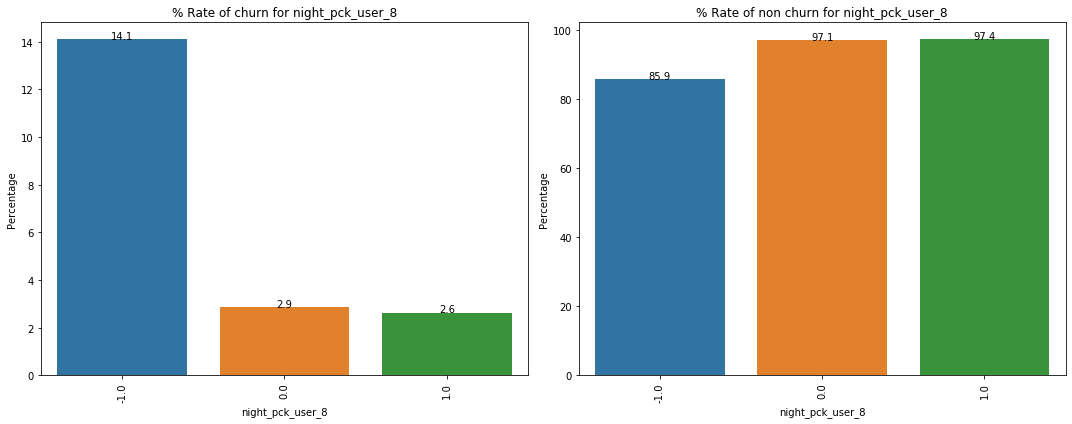

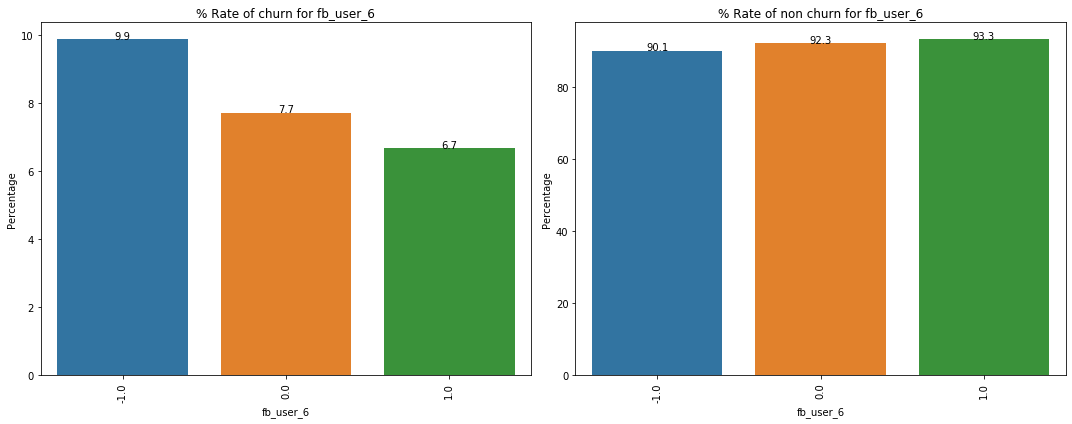

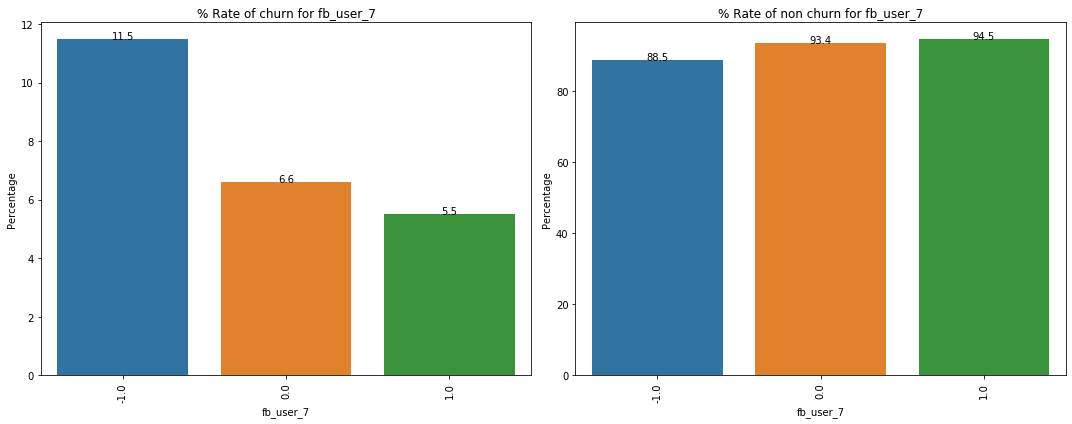

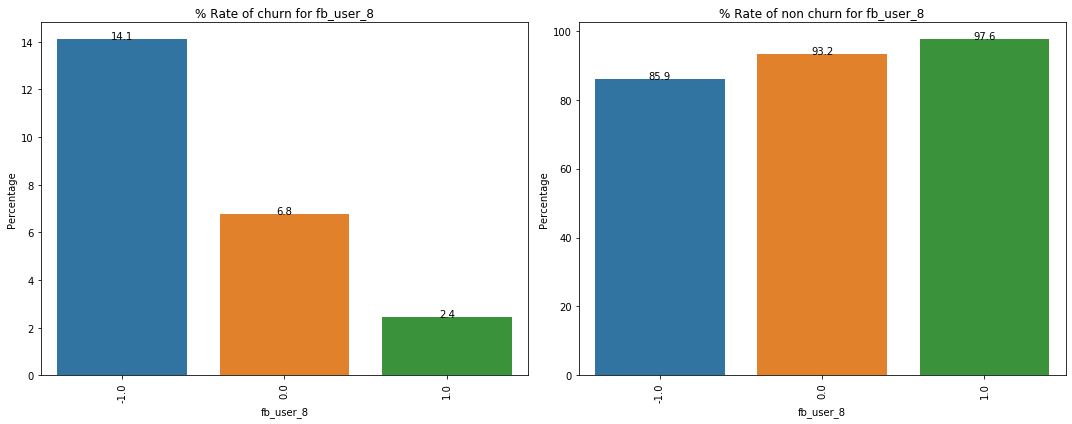

In [43]:
for col in categorical_cols:
    if(col=='churn'):
        continue
    PlotCategories(col)

INFERENCE:
- Customers who opted for schemes to use during specific night hours only were more likely to churn then those who did not opt for the night pack in the month of June.
- However, in the month of July, customers who did not opt for a night pack were more likely to churn. 
- In the month of August, the rate of churn for those who opted for a night pack further decreased as compared to July. The customers who did not opt for a night pack were more likely to churn.
- Customers who availed schemes which allowed them to use facebook or social networking sites are less likely to churn as compared to those who do not opt for any such scheme.This trend is the same across the months of June, July and August with the churn rate being the least in the month of August for those opting for this scheme.

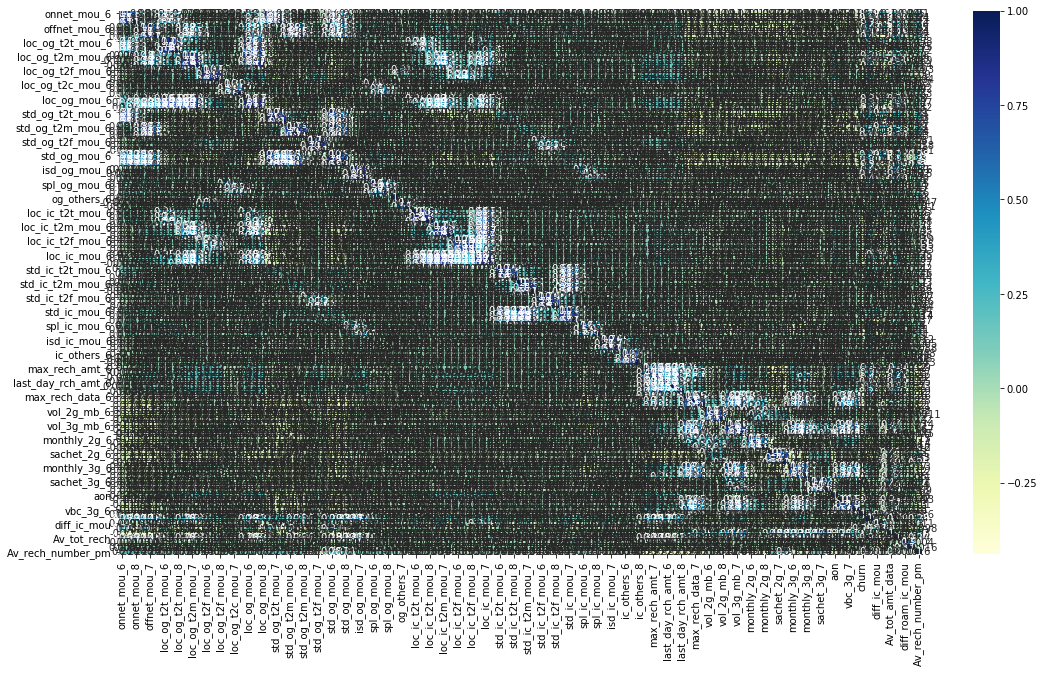

In [44]:
corrMatrix = High_value_Cust.corr()
plt.figure(figsize=(18,10))
sns.heatmap(corrMatrix,cmap="YlGnBu", annot=True)
plt.show()

In [45]:
corrMatrix

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,churn,arpu_pm,diff_ic_mou,diff_oc_mou,Av_tot_amt_data,Av_tot_rech,diff_roam_ic_mou,diff_roam_og_mou,Av_rech_number_pm
onnet_mou_6,1.000000,0.750375,0.618605,0.089438,0.039013,0.037123,0.461162,0.359334,0.311816,0.028040,-0.000411,-0.005573,-0.031119,-0.038955,-0.039285,0.049358,0.033140,0.041214,0.296803,0.228705,0.191509,0.858186,0.636192,0.521610,0.084624,0.043642,0.043320,-0.021967,-0.024052,-0.025621,0.626546,0.448392,0.369932,0.020745,0.005379,-0.001010,0.096902,0.077588,0.082685,0.053616,-0.000606,-0.003194,0.097636,0.086793,0.071643,-0.026315,-0.042827,-0.049054,-0.032577,-0.029295,-0.034834,0.028059,0.012176,-0.001509,0.136516,0.104869,0.093629,0.012012,-0.004455,-0.005885,-0.011505,-0.011820,-0.014629,0.084261,0.054147,0.041867,0.104923,0.068834,0.028384,-0.017122,-0.022026,-0.018009,-0.003955,-0.006130,-0.006725,-0.004207,-0.020943,-0.009680,0.011411,0.000983,-0.004021,-0.185500,-0.191792,-0.166123,-0.108510,-0.106800,-0.089549,-0.109356,-0.115989,-0.101706,-0.103080,-0.112778,-0.096822,-0.126592,-0.128158,-0.105535,-0.092074,-0.093779,-0.083609,-0.052817,-0.046344,-0.045024,-0.042702,-0.105383,-0.111944,-0.101139,0.067264,0.262797,0.049338,0.276981,-0.115427,0.257605,-0.023589,0.004956,0.213301
onnet_mou_7,0.750375,1.000000,0.805621,0.054163,0.084119,0.075350,0.347561,0.468098,0.385310,-0.006874,0.012181,0.001490,-0.037557,-0.034716,-0.036474,0.034048,0.052097,0.055318,0.204410,0.307016,0.242631,0.639814,0.859322,0.693477,0.064318,0.087161,0.081049,-0.025120,-0.019472,-0.024069,0.467769,0.625049,0.507773,0.004762,0.016151,0.022854,0.060467,0.108347,0.106985,0.027901,-0.000601,0.002404,0.054436,0.092685,0.081911,-0.058490,-0.037214,-0.045746,-0.038705,-0.024864,-0.033878,-0.017802,0.019876,0.006288,0.100505,0.131099,0.122817,-0.007897,0.007439,0.005334,-0.012618,-0.010366,-0.014326,0.049510,0.077543,0.065318,0.059253,0.097765,0.082283,-0.024494,-0.017209,-0.018247,-0.009986,-0.004279,-0.004625,-0.027172,0.001555,0.018312,0.007018,0.030600,0.017785,-0.190901,-0.183252,-0.160778,-0.114914,-0.106111,-0.084352,-0.112062,-0.112778,-0.097811,-0.109419,-0.110771,-0.094440,-0.131575,-0.117117,-0.095884,-0.096791,-0.089209,-0.082861,-0.055841,-0.050720,-0.040094,-0.050751,-0.102279,-0.108071,-0.107636,0.011562,0.290249,-0.010019,0.080571,-0.114794,0.287446,-0.011283,-0.002129,0.241033
onnet_mou_8,0.618605,0.805621,1.000000,0.062035,0.091465,0.128289,0.304314,0.387792,0.483636,0.016410,0.023508,0.050595,-0.026843,-0.024691,-0.0144

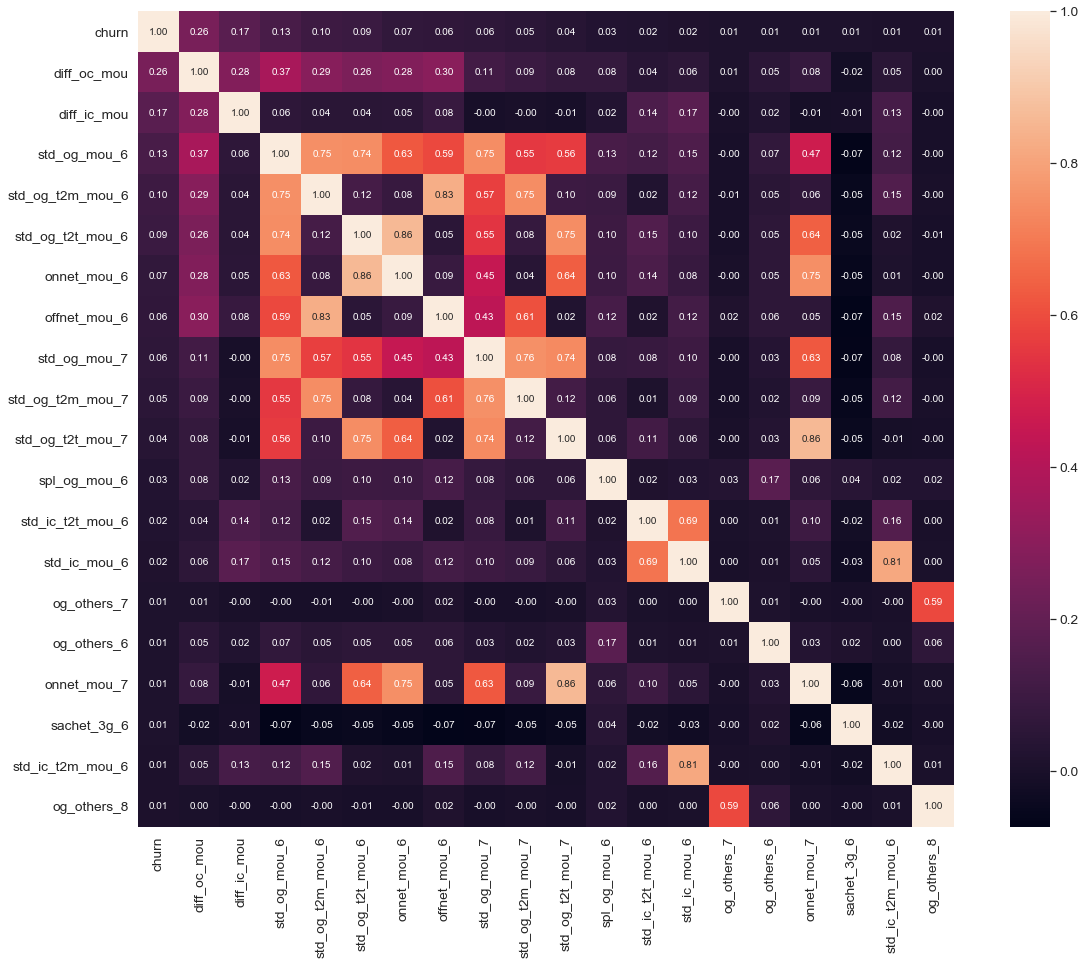

In [46]:
# Showing the correlation matrix for 20 features having the highest correlation value
corrmat=High_value_Cust.corr()
cols = corrmat.nlargest(20,'churn')['churn'].index
p = np.corrcoef(High_value_Cust[cols].values.T)
plt.figure(figsize=(20,15))
sns.set(font_scale=1.25)
hm = sns.heatmap(p, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()


We can see that that the variables are quite highly correlated, for eg. Diff_offnet_7_8 and Diff_total_og_7_8. 

In [47]:
# create plotting functions
def data_type(variable):
    if variable.dtype == np.int64 or variable.dtype == np.float64:
        return 'numerical'
    elif variable.dtype == 'category':
        return 'categorical'
    
def univariate(variable):
    
    if data_type(variable) == 'numerical':
        sns.distplot(variable)
    
    elif data_type(variable) == 'categorical':
        sns.countplot(variable)
        
            
def bivariate(var1, var2):
    if data_type(var1) == 'numerical' and data_type(var2) == 'numerical':
        sns.boxplot(var1, var2)
    elif (data_type(var1) == 'categorical' and data_type(var2) == 'numerical') or (data_type(var1) == 'numerical' and data_type(var2) == 'categorical'):        
        sns.boxplot(var1, var2)


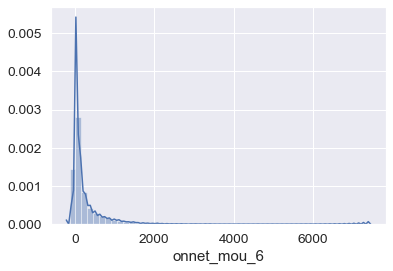

In [48]:
univariate(High_value_Cust.onnet_mou_6)

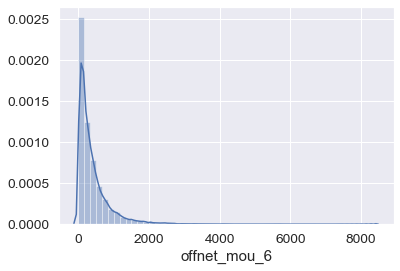

In [49]:
univariate(High_value_Cust.offnet_mou_6 )

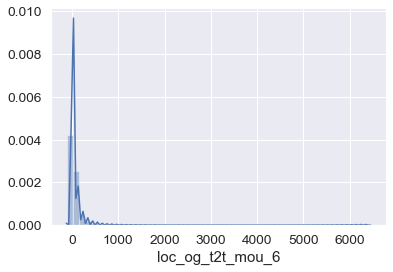

In [50]:
univariate(High_value_Cust.loc_og_t2t_mou_6)

From the above graphs , we can say that data is skewed

### Bivariate EDA

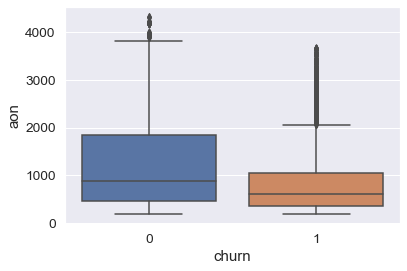

In [51]:
bivariate(High_value_Cust.churn, High_value_Cust.aon)

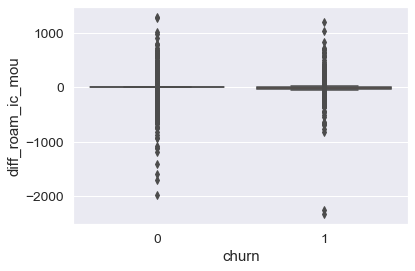

In [52]:
bivariate( High_value_Cust.churn,High_value_Cust.diff_roam_ic_mou)

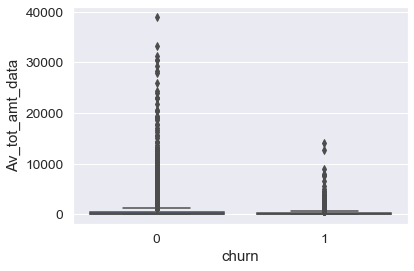

In [53]:
bivariate( High_value_Cust.churn,High_value_Cust.Av_tot_amt_data)

- From the above graphs , we can say that data contains outliers

In [54]:
D1=pd.get_dummies(High_value_Cust['night_pck_user_6'],prefix='night_pck_user_6')
D11=D1.drop(['night_pck_user_6_-1.0'],axis=1)
High_value_Cust=pd.concat([High_value_Cust,D11],axis=1)
High_value_Cust.head()


,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,churn,arpu_pm,diff_ic_mou,diff_oc_mou,Av_tot_amt_data,Av_tot_rech,diff_roam_ic_mou,diff_roam_og_mou,Av_rech_number_pm,night_pck_user_6_0.0,night_pck_user_6_1.0
0,-94.948715,-82.078577,0.00,143.858492,133.318526,0.00,-99.945785,-117.33987,0.00,93.308739,91.377692,0.00,3.78147,3.806291,0.00,2.462374,-2.529707,0.00,-2.941218,-22.160517,0.00,30.771733,33.193822,0.00,87.131272,90.608118,0.00,1.203276,1.185099,0.00,119.091575,124.997458,0.00,-120.41952,-107.850036,0.00,3.910474,4.973072,0.00,0.442877,0.048471,0.0,-58.886636,-63.891445,0.16,107.484823,107.116424,4.13,12.072627,12.593512,1.15,60.593879,55.783535,5.44,-23.060556,-23.206786,0.00,20.715394,21.652671,0.00,2.161984,2.220472,0.00,-0.189069,0.664784,0.00,-67.603604,-64.484647,0.0,7.070296,7.406747,0.00,0.853664,1.011113,0.00,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,968.0,30.40,0.00,101.20,1,208.668000,-5.440,0.000,252.000000,288.666667,20.294193,22.759328,3.000000,1,0
7,57.840000,54.680000,52.29,453.430000,567.160000,325.91,51.390000,31.38000,40.28,308.630000,447.380000,162.28,62.13000,55.140000,53.23,0.000000,0.000000,0.00,422.160000,533.910000,255.79,4.300000,23.290000,12.01,49.890000,31.760000,49.14,6.660000,20.080000,16.68,60.860000,75.140000,77.84,0.00000,0.180000,10.01,4.500000,0.000000,6.50,0.000000,0.000000,0.0,58.140000,32.260000,27.31,217.560000,221.490000,121.19,152.160000,101.460000,39.53,427.880000,355.230000,188.04,36.890000,11.830000,30.39,91.440000,126.990000,141.33,52.190000,34.240000,22.21,180.540000,173.080000,193.94,0.210000,0.000000,0.0,2.060000,14.530000,31.59,15.740000,15.190000,15.14,1580.0,790.0,1580.0,0.0,0.0,779.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,-1.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,802.0,57.74,19.38,18.74,1,1863.503333,163.510,198.225,0.000000,2002.666667,-6.780000,-19.895000,5.666667,0,0
8,413.690000,351.030000,35.08,94.660000,80.630000,136.48,297.130000,217.59000,12.49,80.960000,70.580000,50.54,0.00000,0.000000,0.00,0.000000,0.000000,7.15,378.090000,288.180000,63.04,116.560000,133.430000,22.58,13.690000,10.040000,75.69,0.000000,0.000000,0.00,130.260000,143.480000,98.28,0.00000,0.000000,0.00,0.000000,0.000000,10.23,0.000000,0.000000,0.0,23.840000,9.840000,0.31,57.580000,13.980000,15.48,0.000000,0.000000

In [55]:
D2=pd.get_dummies(High_value_Cust['night_pck_user_7'],prefix='night_pck_user_7')
D22=D2.drop(['night_pck_user_7_-1.0'],1)
High_value_Cust=pd.concat([High_value_Cust,D22],axis=1)
High_value_Cust.head()


,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,churn,arpu_pm,diff_ic_mou,diff_oc_mou,Av_tot_amt_data,Av_tot_rech,diff_roam_ic_mou,diff_roam_og_mou,Av_rech_number_pm,night_pck_user_6_0.0,night_pck_user_6_1.0,night_pck_user_7_0.0,night_pck_user_7_1.0
0,-94.948715,-82.078577,0.00,143.858492,133.318526,0.00,-99.945785,-117.33987,0.00,93.308739,91.377692,0.00,3.78147,3.806291,0.00,2.462374,-2.529707,0.00,-2.941218,-22.160517,0.00,30.771733,33.193822,0.00,87.131272,90.608118,0.00,1.203276,1.185099,0.00,119.091575,124.997458,0.00,-120.41952,-107.850036,0.00,3.910474,4.973072,0.00,0.442877,0.048471,0.0,-58.886636,-63.891445,0.16,107.484823,107.116424,4.13,12.072627,12.593512,1.15,60.593879,55.783535,5.44,-23.060556,-23.206786,0.00,20.715394,21.652671,0.00,2.161984,2.220472,0.00,-0.189069,0.664784,0.00,-67.603604,-64.484647,0.0,7.070296,7.406747,0.00,0.853664,1.011113,0.00,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,968.0,30.40,0.00,101.20,1,208.668000,-5.440,0.000,252.000000,288.666667,20.294193,22.759328,3.000000,1,0,1,0
7,57.840000,54.680000,52.29,453.430000,567.160000,325.91,51.390000,31.38000,40.28,308.630000,447.380000,162.28,62.13000,55.140000,53.23,0.000000,0.000000,0.00,422.160000,533.910000,255.79,4.300000,23.290000,12.01,49.890000,31.760000,49.14,6.660000,20.080000,16.68,60.860000,75.140000,77.84,0.00000,0.180000,10.01,4.500000,0.000000,6.50,0.000000,0.000000,0.0,58.140000,32.260000,27.31,217.560000,221.490000,121.19,152.160000,101.460000,39.53,427.880000,355.230000,188.04,36.890000,11.830000,30.39,91.440000,126.990000,141.33,52.190000,34.240000,22.21,180.540000,173.080000,193.94,0.210000,0.000000,0.0,2.060000,14.530000,31.59,15.740000,15.190000,15.14,1580.0,790.0,1580.0,0.0,0.0,779.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,-1.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,802.0,57.74,19.38,18.74,1,1863.503333,163.510,198.225,0.000000,2002.666667,-6.780000,-19.895000,5.666667,0,0,0,0
8,413.690000,351.030000,35.08,94.660000,80.630000,136.48,297.130000,217.59000,12.49,80.960000,70.580000,50.54,0.00000,0.000000,0.00,0.000000,0.000000,7.15,378.090000,288.180000,63.04,116.560000,133.430000,22.58,13.690000,10.040000,75.69,0.000000,0.000000,0.00,130.260000,143.480000,98.28,0.00000,0.000000,0.00,0.000000,0.000000,10.23,0.000000,0.000000,0.0,23.840000,9.84000

In [56]:
D3=pd.get_dummies(High_value_Cust['night_pck_user_8'],prefix='night_pck_user_8')
D33=D3.drop(['night_pck_user_8_-1.0'],1)
High_value_Cust=pd.concat([High_value_Cust,D33],axis=1)
High_value_Cust.head()


,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,churn,arpu_pm,diff_ic_mou,diff_oc_mou,Av_tot_amt_data,Av_tot_rech,diff_roam_ic_mou,diff_roam_og_mou,Av_rech_number_pm,night_pck_user_6_0.0,night_pck_user_6_1.0,night_pck_user_7_0.0,night_pck_user_7_1.0,night_pck_user_8_0.0,night_pck_user_8_1.0
0,-94.948715,-82.078577,0.00,143.858492,133.318526,0.00,-99.945785,-117.33987,0.00,93.308739,91.377692,0.00,3.78147,3.806291,0.00,2.462374,-2.529707,0.00,-2.941218,-22.160517,0.00,30.771733,33.193822,0.00,87.131272,90.608118,0.00,1.203276,1.185099,0.00,119.091575,124.997458,0.00,-120.41952,-107.850036,0.00,3.910474,4.973072,0.00,0.442877,0.048471,0.0,-58.886636,-63.891445,0.16,107.484823,107.116424,4.13,12.072627,12.593512,1.15,60.593879,55.783535,5.44,-23.060556,-23.206786,0.00,20.715394,21.652671,0.00,2.161984,2.220472,0.00,-0.189069,0.664784,0.00,-67.603604,-64.484647,0.0,7.070296,7.406747,0.00,0.853664,1.011113,0.00,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,968.0,30.40,0.00,101.20,1,208.668000,-5.440,0.000,252.000000,288.666667,20.294193,22.759328,3.000000,1,0,1,0,1,0
7,57.840000,54.680000,52.29,453.430000,567.160000,325.91,51.390000,31.38000,40.28,308.630000,447.380000,162.28,62.13000,55.140000,53.23,0.000000,0.000000,0.00,422.160000,533.910000,255.79,4.300000,23.290000,12.01,49.890000,31.760000,49.14,6.660000,20.080000,16.68,60.860000,75.140000,77.84,0.00000,0.180000,10.01,4.500000,0.000000,6.50,0.000000,0.000000,0.0,58.140000,32.260000,27.31,217.560000,221.490000,121.19,152.160000,101.460000,39.53,427.880000,355.230000,188.04,36.890000,11.830000,30.39,91.440000,126.990000,141.33,52.190000,34.240000,22.21,180.540000,173.080000,193.94,0.210000,0.000000,0.0,2.060000,14.530000,31.59,15.740000,15.190000,15.14,1580.0,790.0,1580.0,0.0,0.0,779.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,-1.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,802.0,57.74,19.38,18.74,1,1863.503333,163.510,198.225,0.000000,2002.666667,-6.780000,-19.895000,5.666667,0,0,0,0,0,0
8,413.690000,351.030000,35.08,94.660000,80.630000,136.48,297.130000,217.59000,12.49,80.960000,70.580000,50.54,0.00000,0.000000,0.00,0.000000,0.000000,7.15,378.090000,288.180000,63.04,116.560000,133.430000,22.58,13.690000,10.040000,75.69,0.000000,0.000000,0.00,130.260000,143.480000,98.28,0.00000,0.000000,0.00,0.000000,0.00

In [57]:
D4=pd.get_dummies(High_value_Cust['fb_user_6'],prefix='fb_user_6')
D44=D4.drop(['fb_user_6_-1.0'],1)
High_value_Cust=pd.concat([High_value_Cust,D44],axis=1)
High_value_Cust.head()


,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,churn,arpu_pm,diff_ic_mou,diff_oc_mou,Av_tot_amt_data,Av_tot_rech,diff_roam_ic_mou,diff_roam_og_mou,Av_rech_number_pm,night_pck_user_6_0.0,night_pck_user_6_1.0,night_pck_user_7_0.0,night_pck_user_7_1.0,night_pck_user_8_0.0,night_pck_user_8_1.0,fb_user_6_0.0,fb_user_6_1.0
0,-94.948715,-82.078577,0.00,143.858492,133.318526,0.00,-99.945785,-117.33987,0.00,93.308739,91.377692,0.00,3.78147,3.806291,0.00,2.462374,-2.529707,0.00,-2.941218,-22.160517,0.00,30.771733,33.193822,0.00,87.131272,90.608118,0.00,1.203276,1.185099,0.00,119.091575,124.997458,0.00,-120.41952,-107.850036,0.00,3.910474,4.973072,0.00,0.442877,0.048471,0.0,-58.886636,-63.891445,0.16,107.484823,107.116424,4.13,12.072627,12.593512,1.15,60.593879,55.783535,5.44,-23.060556,-23.206786,0.00,20.715394,21.652671,0.00,2.161984,2.220472,0.00,-0.189069,0.664784,0.00,-67.603604,-64.484647,0.0,7.070296,7.406747,0.00,0.853664,1.011113,0.00,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,968.0,30.40,0.00,101.20,1,208.668000,-5.440,0.000,252.000000,288.666667,20.294193,22.759328,3.000000,1,0,1,0,1,0,0,1
7,57.840000,54.680000,52.29,453.430000,567.160000,325.91,51.390000,31.38000,40.28,308.630000,447.380000,162.28,62.13000,55.140000,53.23,0.000000,0.000000,0.00,422.160000,533.910000,255.79,4.300000,23.290000,12.01,49.890000,31.760000,49.14,6.660000,20.080000,16.68,60.860000,75.140000,77.84,0.00000,0.180000,10.01,4.500000,0.000000,6.50,0.000000,0.000000,0.0,58.140000,32.260000,27.31,217.560000,221.490000,121.19,152.160000,101.460000,39.53,427.880000,355.230000,188.04,36.890000,11.830000,30.39,91.440000,126.990000,141.33,52.190000,34.240000,22.21,180.540000,173.080000,193.94,0.210000,0.000000,0.0,2.060000,14.530000,31.59,15.740000,15.190000,15.14,1580.0,790.0,1580.0,0.0,0.0,779.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,-1.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,802.0,57.74,19.38,18.74,1,1863.503333,163.510,198.225,0.000000,2002.666667,-6.780000,-19.895000,5.666667,0,0,0,0,0,0,0,0
8,413.690000,351.030000,35.08,94.660000,80.630000,136.48,297.130000,217.59000,12.49,80.960000,70.580000,50.54,0.00000,0.000000,0.00,0.000000,0.000000,7.15,378.090000,288.180000,63.04,116.560000,133.430000,22.58,13.690000,10.040000,75.69,0.000000,0.000000,0.00,130.260000,143.480000,98.28

In [58]:
D5=pd.get_dummies(High_value_Cust['fb_user_7'],prefix='fb_user_7')
D55=D5.drop(['fb_user_7_-1.0'],1)
High_value_Cust=pd.concat([High_value_Cust,D55],axis=1)
High_value_Cust.head()


,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,churn,arpu_pm,diff_ic_mou,diff_oc_mou,Av_tot_amt_data,Av_tot_rech,diff_roam_ic_mou,diff_roam_og_mou,Av_rech_number_pm,night_pck_user_6_0.0,night_pck_user_6_1.0,night_pck_user_7_0.0,night_pck_user_7_1.0,night_pck_user_8_0.0,night_pck_user_8_1.0,fb_user_6_0.0,fb_user_6_1.0,fb_user_7_0.0,fb_user_7_1.0
0,-94.948715,-82.078577,0.00,143.858492,133.318526,0.00,-99.945785,-117.33987,0.00,93.308739,91.377692,0.00,3.78147,3.806291,0.00,2.462374,-2.529707,0.00,-2.941218,-22.160517,0.00,30.771733,33.193822,0.00,87.131272,90.608118,0.00,1.203276,1.185099,0.00,119.091575,124.997458,0.00,-120.41952,-107.850036,0.00,3.910474,4.973072,0.00,0.442877,0.048471,0.0,-58.886636,-63.891445,0.16,107.484823,107.116424,4.13,12.072627,12.593512,1.15,60.593879,55.783535,5.44,-23.060556,-23.206786,0.00,20.715394,21.652671,0.00,2.161984,2.220472,0.00,-0.189069,0.664784,0.00,-67.603604,-64.484647,0.0,7.070296,7.406747,0.00,0.853664,1.011113,0.00,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,968.0,30.40,0.00,101.20,1,208.668000,-5.440,0.000,252.000000,288.666667,20.294193,22.759328,3.000000,1,0,1,0,1,0,0,1,0,1
7,57.840000,54.680000,52.29,453.430000,567.160000,325.91,51.390000,31.38000,40.28,308.630000,447.380000,162.28,62.13000,55.140000,53.23,0.000000,0.000000,0.00,422.160000,533.910000,255.79,4.300000,23.290000,12.01,49.890000,31.760000,49.14,6.660000,20.080000,16.68,60.860000,75.140000,77.84,0.00000,0.180000,10.01,4.500000,0.000000,6.50,0.000000,0.000000,0.0,58.140000,32.260000,27.31,217.560000,221.490000,121.19,152.160000,101.460000,39.53,427.880000,355.230000,188.04,36.890000,11.830000,30.39,91.440000,126.990000,141.33,52.190000,34.240000,22.21,180.540000,173.080000,193.94,0.210000,0.000000,0.0,2.060000,14.530000,31.59,15.740000,15.190000,15.14,1580.0,790.0,1580.0,0.0,0.0,779.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,-1.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,802.0,57.74,19.38,18.74,1,1863.503333,163.510,198.225,0.000000,2002.666667,-6.780000,-19.895000,5.666667,0,0,0,0,0,0,0,0,0,0
8,413.690000,351.030000,35.08,94.660000,80.630000,136.48,297.130000,217.59000,12.49,80.960000,70.580000,50.54,0.00000,0.000000,0.00,0.000000,0.000000,7.15,378.090000,288.180000,63.04,116.560000,133.430000,22.58,13.690000,10.040000,75.69,0.000000,0.000

In [59]:
D6=pd.get_dummies(High_value_Cust['fb_user_8'],prefix='fb_user_8')
D66=D6.drop(['fb_user_8_-1.0'],1)
High_value_Cust=pd.concat([High_value_Cust,D66],axis=1)
High_value_Cust.head()


,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,churn,arpu_pm,diff_ic_mou,diff_oc_mou,Av_tot_amt_data,Av_tot_rech,diff_roam_ic_mou,diff_roam_og_mou,Av_rech_number_pm,night_pck_user_6_0.0,night_pck_user_6_1.0,night_pck_user_7_0.0,night_pck_user_7_1.0,night_pck_user_8_0.0,night_pck_user_8_1.0,fb_user_6_0.0,fb_user_6_1.0,fb_user_7_0.0,fb_user_7_1.0,fb_user_8_0.0,fb_user_8_1.0
0,-94.948715,-82.078577,0.00,143.858492,133.318526,0.00,-99.945785,-117.33987,0.00,93.308739,91.377692,0.00,3.78147,3.806291,0.00,2.462374,-2.529707,0.00,-2.941218,-22.160517,0.00,30.771733,33.193822,0.00,87.131272,90.608118,0.00,1.203276,1.185099,0.00,119.091575,124.997458,0.00,-120.41952,-107.850036,0.00,3.910474,4.973072,0.00,0.442877,0.048471,0.0,-58.886636,-63.891445,0.16,107.484823,107.116424,4.13,12.072627,12.593512,1.15,60.593879,55.783535,5.44,-23.060556,-23.206786,0.00,20.715394,21.652671,0.00,2.161984,2.220472,0.00,-0.189069,0.664784,0.00,-67.603604,-64.484647,0.0,7.070296,7.406747,0.00,0.853664,1.011113,0.00,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,968.0,30.40,0.00,101.20,1,208.668000,-5.440,0.000,252.000000,288.666667,20.294193,22.759328,3.000000,1,0,1,0,1,0,0,1,0,1,0,1
7,57.840000,54.680000,52.29,453.430000,567.160000,325.91,51.390000,31.38000,40.28,308.630000,447.380000,162.28,62.13000,55.140000,53.23,0.000000,0.000000,0.00,422.160000,533.910000,255.79,4.300000,23.290000,12.01,49.890000,31.760000,49.14,6.660000,20.080000,16.68,60.860000,75.140000,77.84,0.00000,0.180000,10.01,4.500000,0.000000,6.50,0.000000,0.000000,0.0,58.140000,32.260000,27.31,217.560000,221.490000,121.19,152.160000,101.460000,39.53,427.880000,355.230000,188.04,36.890000,11.830000,30.39,91.440000,126.990000,141.33,52.190000,34.240000,22.21,180.540000,173.080000,193.94,0.210000,0.000000,0.0,2.060000,14.530000,31.59,15.740000,15.190000,15.14,1580.0,790.0,1580.0,0.0,0.0,779.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,-1.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,802.0,57.74,19.38,18.74,1,1863.503333,163.510,198.225,0.000000,2002.666667,-6.780000,-19.895000,5.666667,0,0,0,0,0,0,0,0,0,0,0,0
8,413.690000,351.030000,35.08,94.660000,80.630000,136.48,297.130000,217.59000,12.49,80.960000,70.580000,50.54,0.00000,0.000000,0.00,0.000000,0.000000,7.15,378.090000,288.180000,63.04,116.560000,133.430000,22.58,13.6

In [60]:
High_value_Cust=High_value_Cust.drop(['night_pck_user_6','night_pck_user_7','night_pck_user_8',
                                      'fb_user_6','fb_user_7','fb_user_7'],axis=1)


In [61]:
High_value_Cust.shape

(30001, 128)

### Treating outliers
Capping outliers in all numeric variables with k-sigma technique

In [62]:
def cap_outliers(array, k=4):
    upper_limit = array.mean() + k*array.std()
    lower_limit = array.mean() - k*array.std()
    array[array<lower_limit] = lower_limit
    array[array>upper_limit] = upper_limit
    return array

In [63]:
# example of capping
sample_array = list(range(100))

#add outliers to the data
sample_array[0] = -9999
sample_array[99] = 9999

# cap outliers
sample_array = np.array(sample_array)
print("Array after capping outliers: \n", cap_outliers(sample_array, k=3))

Array after capping outliers: 
 [-4194     1     2     3     4     5     6     7     8     9    10    11
    12    13    14    15    16    17    18    19    20    21    22    23
    24    25    26    27    28    29    30    31    32    33    34    35
    36    37    38    39    40    41    42    43    44    45    46    47
    48    49    50    51    52    53    54    55    56    57    58    59
    60    61    62    63    64    65    66    67    68    69    70    71
    72    73    74    75    76    77    78    79    80    81    82    83
    84    85    86    87    88    89    90    91    92    93    94    95
    96    97    98  4291]


In [64]:
# cap outliers in the numeric columns
High_value_Cust[numeric_cols] = High_value_Cust[numeric_cols].apply(cap_outliers, axis=0)


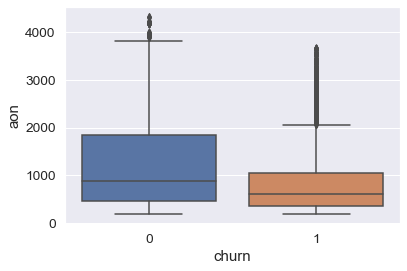

In [65]:
bivariate( High_value_Cust.churn,High_value_Cust.aon)

### Modelling 
#### Preprocessing Data

In [66]:
# change churn to numeric
High_value_Cust['churn'] = pd.to_numeric(High_value_Cust['churn'])

lets create X & y dataset for model building, X will obviously not have "churn" and y will only have "churn"

In [67]:
#Putting feature variables to X
X = High_value_Cust.drop("churn", axis = 1)

#Putting response variable to y
y = High_value_Cust['churn']

High_value_Cust.drop('churn', axis=1, inplace=True)

#### Feature Scaling

In [68]:
# apply scaling on the dataset
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

#### Splitting the Data into Training and Testing Sets

In [69]:
# split the dateset into train and test datasets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)
print("Dimension of X_train:", X_train.shape)
print("Dimension of X_test:", X_test.shape)

Dimension of X_train: (21000, 127)
Dimension of X_test: (9001, 127)


#### Handling the Imbalnace class using SMOTE

In [70]:
y_train_imb = (y_train != 0).sum()/(y_train == 0).sum()
y_test_imb = (y_test != 0).sum()/(y_test == 0).sum()
print("Imbalance in Train Data : ", y_train_imb)
print("Imbalance in Test Data : ", y_test_imb)

Imbalance in Train Data :  0.08875985068436333
Imbalance in Test Data :  0.08812862669245648


In [71]:
# As discussed earlier, given dataset is skewed, lets balance the dataset

sm = SMOTE()
X_tr,y_tr = sm.fit_sample(X_train,y_train)


In [72]:
print("Dimension of X_tr Shape:", X_tr.shape)
print("Dimension of y_tr Shape:", y_tr.shape)

imb = (y_tr  != 0).sum()/(y_tr == 0).sum()
print("Imbalance in Train Data : ",imb)

Dimension of X_tr Shape: (38576, 127)
Dimension of y_tr Shape: (38576,)
Imbalance in Train Data :  1.0


### Model Building

### Logistic regression using RFE

In [73]:
# Feature reduction using RFE
##from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
##from sklearn.feature_selection import RFE

# running RFE with 15 variables as output
rfe = RFE(lr, 15)   
rfe = rfe.fit(X_tr, y_tr)

In [74]:
rfe_features = list(High_value_Cust.columns[rfe.support_])
print("15 most important features selected by RFE ", rfe_features)

15 most important features selected by RFE  ['onnet_mou_7', 'offnet_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_8', 'og_others_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_8', 'loc_ic_mou_6', 'spl_ic_mou_8', 'max_rech_data_8', 'monthly_2g_8', 'sachet_2g_8']


In [75]:
list(zip(High_value_Cust.columns, rfe.support_, rfe.ranking_))

[('onnet_mou_6', False, 47),
 ('onnet_mou_7', True, 1),
 ('onnet_mou_8', False, 48),
 ('offnet_mou_6', False, 50),
 ('offnet_mou_7', True, 1),
 ('offnet_mou_8', False, 49),
 ('loc_og_t2t_mou_6', False, 25),
 ('loc_og_t2t_mou_7', False, 12),
 ('loc_og_t2t_mou_8', False, 71),
 ('loc_og_t2m_mou_6', False, 36),
 ('loc_og_t2m_mou_7', False, 11),
 ('loc_og_t2m_mou_8', False, 23),
 ('loc_og_t2f_mou_6', False, 113),
 ('loc_og_t2f_mou_7', False, 14),
 ('loc_og_t2f_mou_8', False, 27),
 ('loc_og_t2c_mou_6', False, 89),
 ('loc_og_t2c_mou_7', False, 52),
 ('loc_og_t2c_mou_8', False, 53),
 ('loc_og_mou_6', False, 24),
 ('loc_og_mou_7', False, 13),
 ('loc_og_mou_8', True, 1),
 ('std_og_t2t_mou_6', False, 59),
 ('std_og_t2t_mou_7', True, 1),
 ('std_og_t2t_mou_8', True, 1),
 ('std_og_t2m_mou_6', False, 93),
 ('std_og_t2m_mou_7', False, 10),
 ('std_og_t2m_mou_8', True, 1),
 ('std_og_t2f_mou_6', False, 111),
 ('std_og_t2f_mou_7', False, 108),
 ('std_og_t2f_mou_8', False, 6),
 ('std_og_mou_6', False, 46),

In [76]:
X_rfe = pd.DataFrame(data=X_tr).iloc[:, rfe.support_]
y_rfe = y_tr

In [77]:
# lets create a Logisctic Regression model on the seleted columns by RFE

lr = LogisticRegression(random_state=1)
lr.fit(X_rfe, y_rfe)

LogisticRegression(random_state=1)

In [78]:
X_test_rfe = pd.DataFrame(data=X_test).iloc[:, rfe.support_]

y_pred = lr.predict(X_test_rfe)

##from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)


[[6848 1424]
 [ 137  592]]


In [79]:
print('Accuracy of Logistic Regression Model on test set is ',lr.score(X_test_rfe, y_test))

Accuracy of Logistic Regression Model on test set is  0.8265748250194422


In [80]:
##from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.83      0.90      8272
           1       0.29      0.81      0.43       729

    accuracy                           0.83      9001
   macro avg       0.64      0.82      0.66      9001
weighted avg       0.92      0.83      0.86      9001



- Model Accuracy is 83%
- Confusion matix clearly shows that the model has drawback in predicting churn as high false positives,lets try PCA now.

### PCA

In [81]:
#Improting the PCA module
##from sklearn.decomposition import PCA
pca = PCA(random_state=100)

#Doing the PCA on the train data
pca.fit(X_tr)

PCA(random_state=100)

In [82]:
X_tr_pca = pca.fit_transform(X_tr)
print(X_tr_pca.shape)

X_test_pca = pca.transform(X_test)
print(X_test_pca.shape)

(38576, 127)
(9001, 127)


### Applying logistic regression

In [83]:
##from sklearn.linear_model import LogisticRegression
##from sklearn import metrics
lr_pca = LogisticRegression(C=1e9)
lr_pca.fit(X_tr_pca, y_tr)

# make the predictions
y_pred = lr_pca.predict(X_test_pca)

# convert prediction array into a dataframe
y_pred_df = pd.DataFrame(y_pred)

In [84]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Printing confusion matrix
print(confusion_matrix(y_test,y_pred))

[[6981 1291]
 [ 145  584]]


In [85]:
print("Accuracy of the logistic regression model with PCA: ",accuracy_score(y_test,y_pred))

Accuracy of the logistic regression model with PCA:  0.8404621708699034


In [86]:
col = list(High_value_Cust.columns)
df_pca = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'PC3':pca.components_[2],'Feature':col})
df_pca.head(10)

,PC1,PC2,PC3,Feature
0,0.165963,-0.037002,-0.010283,onnet_mou_6
1,0.159884,0.002979,-0.032001,onnet_mou_7
2,0.116802,0.056841,-0.033737,onnet_mou_8
3,0.162351,-0.022632,0.132381,offnet_mou_6
4,0.164846,0.023467,0.090235,offnet_mou_7
5,0.100623,0.067170,0.080876,offnet_mou_8
6,0.058132,0.088607,0.084523,loc_og_t2t_mou_6
7,0.067196,0.112130,0.057664,loc_og_t2t_mou_7
8,0.072233,0.158905,0.004362,loc_og_t2t_mou_8
9,0.039414,0.097402,0.182925,loc_og_t2m_mou_6


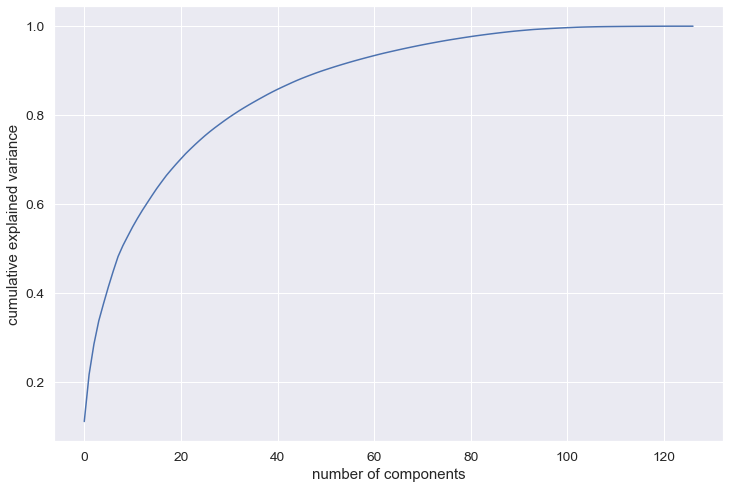

In [87]:
# scree plot to check the variance explained by different PCAs
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [88]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([ 11.11,  21.67,  28.49,  33.72,  37.65,  41.41,  44.92,  48.21,
        50.66,  52.77,  54.85,  56.76,  58.55,  60.22,  61.88,  63.49,
        64.98,  66.43,  67.72,  68.97,  70.16,  71.34,  72.41,  73.44,
        74.43,  75.39,  76.29,  77.14,  77.95,  78.74,  79.51,  80.23,
        80.94,  81.61,  82.26,  82.89,  83.5 ,  84.1 ,  84.69,  85.26,
        85.8 ,  86.32,  86.82,  87.32,  87.8 ,  88.25,  88.68,  89.09,
        89.49,  89.87,  90.23,  90.58,  90.93,  91.26,  91.59,  91.91,
        92.22,  92.52,  92.82,  93.11,  93.39,  93.67,  93.93,  94.18,
        94.43,  94.67,  94.91,  95.14,  95.37,  95.59,  95.81,  96.02,
        96.22,  96.42,  96.62,  96.81,  96.99,  97.16,  97.33,  97.5 ,
        97.66,  97.82,  97.97,  98.11,  98.25,  98.38,  98.51,  98.63,
        98.75,  98.87,  98.97,  99.07,  99.16,  99.25,  99.32,  99.39,
        99.45,  99.51,  99.56,  99.61,  99.66,  99.71,  99.76,  99.8 ,
        99.83,  99.85,  99.87,  99.89,  99.91,  99.92,  99.93,  99.94,
      

In [89]:
# 54 columns explains 90% of the variance, lets apply PCA with 54 components
pca_54 = PCA(n_components=54)

df_tr_pca_54 = pca_54.fit_transform(X_tr)
print(df_tr_pca_54.shape)

df_test_pca_54 = pca_54.transform(X_test)
print(df_test_pca_54.shape)

(38576, 54)
(9001, 54)


In [90]:
# Let's run the model using the selected variables
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
lr_pca1 = LogisticRegression(C=1e9)
lr_pca1.fit(df_tr_pca_54, y_tr)

# Predicted probabilities
y_pred54 = lr_pca1.predict(df_test_pca_54)

# Converting y_pred to a dataframe which is an array
df_y_pred = pd.DataFrame(y_pred54)

In [91]:
print(confusion_matrix(y_test,y_pred54))

[[6955 1317]
 [ 153  576]]


In [92]:
print("Logistic Regression accuracy with 54 PCAs: ",accuracy_score(y_test,y_pred54))

Logistic Regression accuracy with 54 PCAs:  0.836684812798578


In [93]:
from imblearn.metrics import sensitivity_specificity_support

sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred54, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')


Sensitivity: 	0.79
Specificity: 	0.84


- Model has 83% Accuracy 54 features can explain 90% variance in the dataset.

In [95]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
# PCA
pca = PCA()

# logistic regression - the class weight is used to handle class imbalance - it adjusts the cost function
logistic = LogisticRegression(class_weight={0:0.1, 1: 0.9})

# create pipeline
steps = [("scaler", StandardScaler()), 
         ("pca", pca),
         ("logistic", logistic)
        ]

# compile pipeline
pca_logistic = Pipeline(steps)

# hyperparameter space
params = {'pca__n_components': [60, 80], 'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=pca_logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [96]:
# fit model
model.fit(X_tr, y_tr)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   45.9s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:  2.6min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('logistic',
                                        LogisticRegression(class_weight={0: 0.1,
                                                                         1: 0.9}))]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
                         'logistic__penalty': ['l1', 'l2'],
                         'pca__n_components': [60, 80]},
             scoring='roc_auc', verbose=1)

In [97]:
# cross validation results
pd.DataFrame(model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logistic__C,param_logistic__penalty,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,3.305241,0.090181,0.000000,0.000000,0.1,l1,60,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,32
1,3.891251,0.082145,0.000000,0.000000,0.1,l1,80,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,19
2,3.600892,0.218209,0.084193,0.007630,0.1,l2,60,"{'logistic__C': 0.1, 'logistic__penalty': 'l2'...",0.915717,0.911464,0.913767,0.913569,0.915736,0.914050,0.001589,9
3,4.425792,0.135386,0.098593,0.016481,0.1,l2,80,"{'logistic__C': 0.1, 'logistic__penalty': 'l2'...",0.919051,0.914264,0.917367,0.917507,0.919307,0.917499,0.001798,1
4,2.929322,0.060398,0.000000,0.000000,0.5,l1,60,"{'logistic__C': 0.5, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,28
5,3.567611,0.042314,0.000000,0.000000,0.5,l1,80,"{'logistic__C': 0.5, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,22
6,3.428641,0.032222,0.081224,0.003260,0.5,l2,60,"{'logistic__C': 0.5, 'logistic__penalty': 'l2'...",0.915125,0.911798,0.913664,0.913400,0.915699,0.913937,0.001375,11
7,4.376552,0.027728,0.086550,0.006739,0.5,l2,80,"{'logistic__C': 0.5, 'logistic__penalty': 'l2'...",0.918659,0.913920,0.917068,0.917549,0.919222,0.917284,0.001848,3
8,2.915205,0.087460,0.000000,0.000000,1,l1,60,"{'logistic__C': 1, 'logistic__penalty': 'l1', ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,30
9,3.777924,0.097727,0.000000,0.000000,1,l1,80,"{'logistic__C': 1, 'logistic__penalty': 'l1', ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,29


In [98]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.9174992275080193
Best hyperparameters:  {'logistic__C': 0.1, 'logistic__penalty': 'l2', 'pca__n_components': 80}


In [99]:
# predict churn on test data
y_pred = model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[3684 4588]
 [  37  692]]
Sensitivity: 	0.95
Specificity: 	0.45
AUC:    	 0.89


### Decision Trees

In [100]:
#pca = PCA(n_components = 54)
#X_train = pca.fit_transform(X_tr)
#X_test = pca.transform(X_test)
#explained_variance = pca.explained_variance_ratio_
#print(explained_variance)

In [101]:
# import decision tree libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# lets create a decision tree with the default hyper parameters except max depth to make the tree readable
High_value_Cust1 = DecisionTreeClassifier(max_depth=5)
High_value_Cust1.fit(df_tr_pca_54, y_tr)

DecisionTreeClassifier(max_depth=5)

In [103]:
# lets see the classification reort of the model built
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Make predictions
prediction_test = High_value_Cust1.predict(df_test_pca_54)
print ('Decision Tree - Accuracy :',metrics.accuracy_score(y_test, prediction_test))

# classification report
print(classification_report(y_test,prediction_test))

Decision Tree - Accuracy : 0.8574602821908677
              precision    recall  f1-score   support

           0       0.97      0.87      0.92      8272
           1       0.33      0.71      0.45       729

    accuracy                           0.86      9001
   macro avg       0.65      0.79      0.68      9001
weighted avg       0.92      0.86      0.88      9001



In [105]:
# confusion matrix
print(confusion_matrix(y_test,prediction_test))
# accuracy of the decision tree
print('Decision Tree - Accuracy :',accuracy_score(y_test,prediction_test))

[[7203 1069]
 [ 214  515]]
Decision Tree - Accuracy : 0.8574602821908677


#### Lets fine tune hyperparameters

In [106]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(1, 40)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)
                               
# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                   return_train_score=True)
tree.fit(df_tr_pca_54, y_tr)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'max_depth': range(1, 40)}, return_train_score=True,
             scoring='accuracy')

In [107]:
# grid search results
score = tree.cv_results_
pd.DataFrame(score).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.444521,0.010646,0.006524,0.001965,1,{'max_depth': 1},0.783696,0.792223,0.787168,0.785483,0.796500,0.789014,0.004701,38,0.790732,0.788600,0.789832,0.790091,0.787531,0.789357,0.001146
1,0.886710,0.054933,0.002686,0.002215,2,{'max_depth': 2},0.783696,0.792223,0.787168,0.785483,0.796500,0.789014,0.004701,38,0.790732,0.788600,0.789832,0.790091,0.787531,0.789357,0.001146
2,1.246174,0.049008,0.004833,0.002691,3,{'max_depth': 3},0.796527,0.800389,0.791704,0.793260,0.806351,0.797646,0.005274,37,0.805833,0.799391,0.795729,0.799520,0.804349,0.800964,0.003664
3,1.615372,0.033616,0.004067,0.002582,4,{'max_depth': 4},0.805858,0.816980,0.811925,0.812314,0.816073,0.812630,0.003930,36,0.818957,0.815884,0.816532,0.817504,0.815852,0.816946,0.001171
4,1.920420,0.029236,0.005747,0.003555,5,{'max_depth': 5},0.812856,0.824109,0.818924,0.815943,0.826442,0.819655,0.005029,35,0.828743,0.827485,0.826286,0.826674,0.828683,0.827574,0.001007


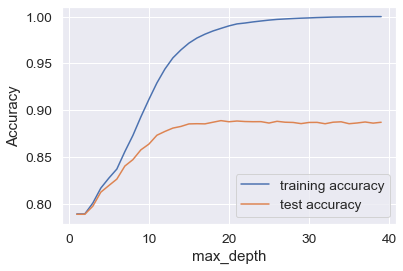

In [108]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(score["param_max_depth"], 
         score["mean_train_score"], 
         label="training accuracy")
plt.plot(score["param_max_depth"], 
         score["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


# max_depth =10 seems to be the optimal one

In [109]:
# lets find optimal value of minimum sample leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                   return_train_score=True)
tree.fit(df_tr_pca_54, y_tr)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'min_samples_leaf': range(5, 200, 20)},
             return_train_score=True, scoring='accuracy')

In [110]:
# grid search results
score = tree.cv_results_
pd.DataFrame(score).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,3.734409,0.040776,0.010658,0.006870,5,{'min_samples_leaf': 5},0.879082,0.883085,0.875308,0.876345,0.876993,0.878163,0.002753,1,0.960143,0.962639,0.962639,0.962995,0.960500,0.961783,0.001206
1,2.956501,0.074587,0.000000,0.000000,25,{'min_samples_leaf': 25},0.858605,0.860661,0.849255,0.846922,0.861050,0.855299,0.005991,2,0.900421,0.898253,0.893976,0.895240,0.898415,0.897261,0.002332
2,2.665001,0.059605,0.006249,0.007654,45,{'min_samples_leaf': 45},0.848237,0.845237,0.845366,0.837719,0.849514,0.845215,0.004095,3,0.875924,0.876900,0.873076,0.875895,0.876802,0.875719,0.001388
3,2.535024,0.030250,0.000997,0.001994,65,{'min_samples_leaf': 65},0.837221,0.845107,0.836034,0.834349,0.847051,0.839952,0.005122,4,0.863804,0.864230,0.863744,0.865072,0.864327,0.864236,0.000477
4,2.528620,0.135831,0.009140,0.006752,85,{'min_samples_leaf': 85},0.829834,0.846014,0.833182,0.833441,0.841607,0.836816,0.006015,5,0.855800,0.857425,0.854055,0.857069,0.854509,0.855772,0.001339


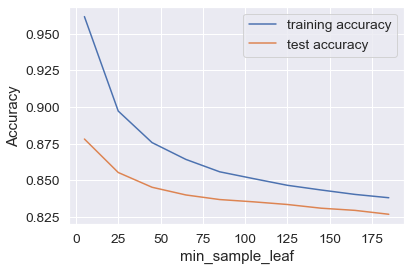

In [111]:
# plotting accuracies with min_sample_leaf
plt.figure()
plt.plot(score["param_min_samples_leaf"], 
         score["mean_train_score"], 
         label="training accuracy")
plt.plot(score["param_min_samples_leaf"], 
         score["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_sample_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# min_sample_leaf =25 seems to be the optimal one

In [112]:
# lets fine tune min sample split now
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                   return_train_score=True)
tree.fit(df_tr_pca_54, y_tr)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'min_samples_split': range(5, 200, 20)},
             return_train_score=True, scoring='accuracy')

In [113]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,4.880835,0.371497,0.006334,0.005098,5,{'min_samples_split': 5},0.887636,0.882696,0.883344,0.884511,0.881141,0.883866,0.002177,1,0.993908,0.994362,0.993843,0.993584,0.994200,0.993979,0.000274
1,4.598252,0.172049,0.004123,0.006068,25,{'min_samples_split': 25},0.876620,0.872197,0.870123,0.873234,0.869864,0.872408,0.002456,2,0.957129,0.957163,0.958232,0.957876,0.958686,0.957817,0.000605
2,4.348413,0.133201,0.004128,0.006077,45,{'min_samples_split': 45},0.867548,0.865198,0.857032,0.862346,0.863772,0.863179,0.003521,3,0.937135,0.933281,0.931110,0.935031,0.939924,0.935297,0.003048
3,4.543729,0.257729,0.003386,0.002787,65,{'min_samples_split': 65},0.855495,0.860791,0.853143,0.854051,0.856643,0.856024,0.002667,4,0.921711,0.918441,0.915006,0.917760,0.923852,0.919354,0.003101
4,4.546367,0.188318,0.008118,0.004210,85,{'min_samples_split': 85},0.849145,0.859235,0.846403,0.850421,0.851458,0.851332,0.004298,5,0.910013,0.908461,0.905479,0.909919,0.910372,0.908849,0.001807


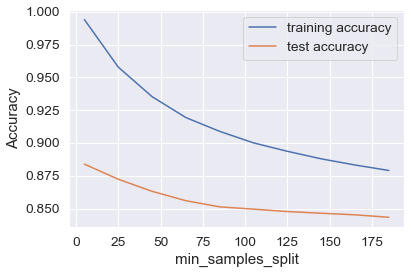

In [114]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# min_samples_split=50 seems to be optimal

In [115]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(25, 175, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(df_tr_pca_54, y_tr)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:  5.1min finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(25, 175, 50),
                         'min_samples_split': range(50, 150, 50)},
             verbose=1)

In [116]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results
# printing the optimal accuracy score and hyperparameters
print("Best Accuracy", grid_search.best_score_)

Best Accuracy 0.8496214311896029


In [117]:
print(grid_search.best_estimator_)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=25, min_samples_split=50)


In [119]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=5, 
                                  min_samples_leaf=25,
                                  min_samples_split=50)
clf_gini.fit(df_tr_pca_54, y_tr)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=25, min_samples_split=50,
                       random_state=100)

In [120]:
# accuracy score
print ('Accuracy Score for Decision Tree Final Model :',clf_gini.score(df_test_pca_54,y_test))

Accuracy Score for Decision Tree Final Model : 0.8562381957560271


### Random Forest with PCA

In [121]:
##from sklearn.ensemble import RandomForestClassifier
##from sklearn import metrics

model_rf = RandomForestClassifier()
model_rf.fit(df_tr_pca_54, y_tr)

# Make predictions
prediction_test = model_rf.predict(df_test_pca_54)
print ('Randon Forest Accuracy with Default Hyperparameter',metrics.accuracy_score(y_test, prediction_test))

Randon Forest Accuracy with Default Hyperparameter 0.9194533940673258


In [122]:
print(classification_report(y_test,prediction_test))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96      8272
           1       0.50      0.54      0.52       729

    accuracy                           0.92      9001
   macro avg       0.73      0.75      0.74      9001
weighted avg       0.92      0.92      0.92      9001



In [123]:
# Printing confusion matrix
print(confusion_matrix(y_test, prediction_test))

[[7881  391]
 [ 334  395]]


In [124]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                  return_train_score=True)
rf.fit(df_tr_pca_54, y_tr)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(2, 20, 5)}, return_train_score=True,
             scoring='accuracy')

In [125]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,5.603174,0.073154,0.069613,0.000747,2,{'max_depth': 2},0.791861,0.801167,0.797926,0.793390,0.806092,0.798087,0.005185,4,0.800745,0.799358,0.800266,0.799229,0.797803,0.799480,0.001011
1,16.250198,0.109552,0.107852,0.001563,7,{'max_depth': 7},0.834889,0.842903,0.839533,0.834219,0.845755,0.839460,0.004469,3,0.852528,0.851139,0.848774,0.848385,0.852662,0.850697,0.001814
2,24.126561,0.116795,0.163098,0.000986,12,{'max_depth': 12},0.916019,0.911601,0.913415,0.913804,0.915619,0.914092,0.001599,2,0.954861,0.955154,0.958426,0.958815,0.957908,0.957033,0.001681
3,28.325455,0.130360,0.192659,0.004377,17,{'max_depth': 17},0.952177,0.947116,0.944005,0.946209,0.945949,0.947091,0.002738,1,0.990117,0.990765,0.991024,0.990862,0.990765,0.990707,0.000310


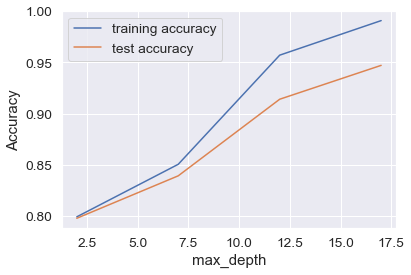

In [126]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [127]:
##Tuning n_estimators
## GridSearchCV to find optimal n_estimators
#from sklearn.model_selection import KFold
## specify number of folds for k-fold CV
n_folds = 5
#
## parameters to build the model on
parameters = {'n_estimators': range(100, 1500, 400)}
#
## instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=4)
#
#
## fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                  return_train_score=True)
rf.fit(df_tr_pca_54, y_tr)

GridSearchCV(cv=5, estimator=RandomForestClassifier(max_depth=4),
             param_grid={'n_estimators': range(100, 1500, 400)},
             return_train_score=True, scoring='accuracy')

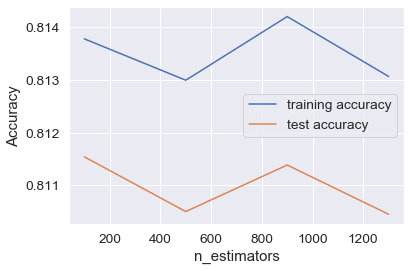

In [128]:
## scores of GridSearch CV
scores = rf.cv_results_
#
## plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [129]:
# GridSearchCV to find optimal min_samples_leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(50, 400, 10)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                  return_train_score=True)
rf.fit(df_tr_pca_54, y_tr)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'min_samples_leaf': range(50, 400, 10)},
             return_train_score=True, scoring='accuracy')

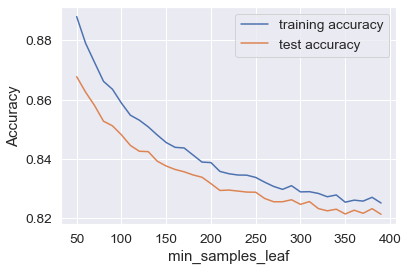

In [130]:
# scores of GridSearch CV
scores = rf.cv_results_

# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [131]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(100, 500, 25)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                   return_train_score=True)
rf.fit(df_tr_pca_54, y_tr)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'min_samples_split': range(100, 500, 25)},
             return_train_score=True, scoring='accuracy')

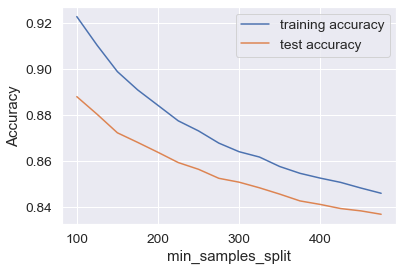

In [132]:
# scores of GridSearch CV
scores = rf.cv_results_

# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [133]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 300, 100),
    'min_samples_split': range(200, 500, 100),
    'n_estimators': [500,700], 
    'max_features': [10,20,25]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [135]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

model_rf = RandomForestClassifier(bootstrap=True,
                                  max_depth=10,
                                  min_samples_leaf=100, 
                                  min_samples_split=200,
                                  n_estimators=1000 ,
                                  oob_score = True, n_jobs = -1,
                                  random_state =50,
                                  max_features = 15,
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)


In [136]:
# evaluation metrics
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,prediction_test))
print(confusion_matrix(y_test,prediction_test))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97      5493
           1       0.75      0.38      0.50       508

    accuracy                           0.94      6001
   macro avg       0.85      0.68      0.73      6001
weighted avg       0.93      0.94      0.93      6001

[[5429   64]
 [ 317  191]]


In [137]:
# accuracy score
print ('Accuracy Score for Random Forest Final Model :',metrics.accuracy_score(y_test, prediction_test))

Accuracy Score for Random Forest Final Model : 0.9365105815697384


The model is predicting:
- with an Accuracy of 93%, which is very good for a model and better than that on the train set.
- 191 actual churners as churners.
- 64 non-churners as churners, which is good given the situation of the market and the industry.
- 5429 non-churners as non-churners.
- 317 churners as non-churners 
(this is definitely a good model prediction though not ideal).

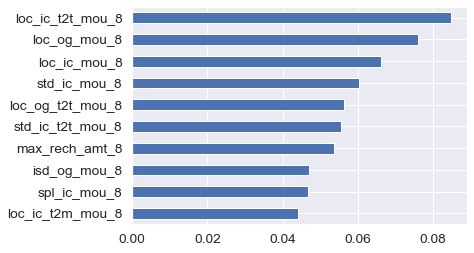

In [138]:
# list of important features
X = High_value_Cust
features = X.columns.values
X = pd.DataFrame(scaler.transform(X))
X.columns = features

importances = model_rf.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)
Observations:

- From random forest algorithm,loc_ic_t2t_mou_8, loc_og_mou_8, loc_ic_mou_8, loc_og_t2t_mou_8 and std_ic_mou_8 are the most important predictor variables to predict churn.
- The results of Decision Trees are similar to logistic regression.
- Random Forest is the best method to Predict Churn followed by other models too do a fair job
- Behaviour is 8 Month can be the base of Churn Analysis
- Local Incoming and Outgoing Calls for 8th Month and Average Revenue in 8th Month are strong indicators of Churn Behaviourweights.sort_values()[-10:].plot(kind = 'barh')

#### <font color = Green> Model building steps:</font>
Below are the steps taken to analyse and deduce stratergies for Customer Churn:

- Initially while analysing the data we had 226 variables overall.
- Data cleaning & Preprocessing step has been performed where we have handled missing values ( Treated Missing Values in Categorical Columns, recharge columns & convert columns to appropriate formats, removed unnecessary varibles, handle numerical columns with 5-10% missing values using iterative imputer, etc.)
- Then We have filtered High Value Customers (HVC)based on the sum of recharges in month 6 and 7.
- Identify churn based on the criteria that the usage of 'vol_3g_mb_9', 'vol_2g_mb_9','total_ic_mou_9','total_og_mou_9'
- Remove the month 9 columns from all the variables since they are not necessary for prediction
- Derived some useful new variables from dataset like Average revenue per user per month(arpu_pm), difference Incoming & outgoing call mou per month(diff_ic_mou & diff_og_mou), Average total recharge call(Av_tot_rech) etc.
- Did some EDA and created Correlation matrix of the new derived dataframe consisting of only month 6 ,7 and 8 columns for exploratory analysis. Also perfromed Univariate and bi variate analysis over some of the variables
- Outlier treatment of the variables defined in the new dataframe.
- Perfromed Train-test split & handle the imbalance class on training set using SMOTE.
- Built two models, 
    - One with good interpretability For which we build Logistics regression without PCA and 
    - Other with good predictions For which we build three models with PCA: Logistic regression, Decision Tree, Random Forest.
- Logistic Regression + PCA final model Summary
    - Accuracy Score : 0.83
- Decision Tree final model Summary
    - Accuracy Score : 0.85
- Random Forest final model Summary
    - Accuracy Score: 0.93
- The random forest model is a better model for prediction as it gives better sensitivity and recall values as well as auc score when compared to the PCA+logistic regression model & Decision Tree model.


#### <font color = Green> Observations:</font>

- From random forest algorithm,loc_ic_t2t_mou_8, loc_og_mou_8, loc_ic_mou_8, loc_og_t2t_mou_8 and std_ic_mou_8 are the most important predictor variables to predict churn.
- The results of Decision Trees are similar to logistic regression.
- Random Forest is the best method to Predict Churn followed by other models too do a fair job
- Behaviour is 8 Month can be the base of Churn Analysis


#### <font color = Green> Important predictor variables to predict churn:</font>

1. loc_ic_t2t_mou_8
2. loc_og_mou_8
3. loc_ic_mou_8
4. std_ic_mou_8
5. loc_og_t2t_mou_8
6. std_ic_t2t_mou_8
7. max_rech_amt_8
8. isd_og_mou_8
9. spl_ic_mou_8
10. loc_ic_t2m_mou_8


#### <font color = Green> Conclusions:</font> 

- Previous month is really an important factor for churn prediction. For example to predict churn of 9, month 8 is most important month to consider
- We can clearly infer that calls related incoming & outgoing within a circle is key for identifying churn customers
- Local incoming and outgoing minutes (of previous month) of usage are the top two deciding factors. If these two decreases in previous month churning probability also increases.
- Local Incoming mou for Month 8, local Outgoing mou for Month 8, STD incoming mou for month 8 and Max Recharge Amount for Month 8 are the most important predictor variables to predict churn.


####  <font color = Green> Business Insights & Strategies to reduce churn: </font>

- Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition. So, the company should make the customer retention one of their top priorities if not the top priority.
- Give freebies to newer customers.
- Ensuring smooth intra and external network call coverage facility
- Reducing the data rates to encourage customers to use more amount of data
- Once it is noticed that the total recharge amount starts decreasing, and along with it the incoming and outgoing calls also decreases, frequency of recharge decreases, give promotional offers.
- Noticing the difference in data used, average revenue, recharge amount between the good and action phase is very crucial. If a there is a large difference, the customer is likely to churn, so new offers has to be given to them.
- Give data packs at a discounted price to customers who are likely to churn.
- Cashbacks on recharge amounts can be given or any such exciting offers can be directed towards the customers who are more likely to churn.
- The company needs to focus on the STD and ISD rates. The company can provide the customers using these services with some kind of STD and ISD packages.
- Last but not the least; provide good netword coverage and customer service. Very often, idea of leaving the existing network provider comes to a customer from bad experiences with the network coverage and customer service.
- Provide customized plans and service to fit customers' needs.
- Don't spam their mailbox/message box sending too many irrelevant offers. Perhaps start a new program to stand out from other providers such as Opt-in/Opt-out of promotions, campaigns, ads, offers. This could give a sense of company respecting customers boundaries and privacy, which coudl translate in the form of increased loyalty.

------------------------------------------------------------------------------------------------------------